In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
plt.style.use('ggplot')

In [2]:
#importing dataset
dataset = pd.read_csv('311_Service_Requests_from_2010_to_Present.csv')
dataset.info()

C:\Users\LENOVO\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (48,49) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300698 entries, 0 to 300697
Data columns (total 53 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unique Key                      300698 non-null  int64  
 1   Created Date                    300698 non-null  object 
 2   Closed Date                     298534 non-null  object 
 3   Agency                          300698 non-null  object 
 4   Agency Name                     300698 non-null  object 
 5   Complaint Type                  300698 non-null  object 
 6   Descriptor                      294784 non-null  object 
 7   Location Type                   300567 non-null  object 
 8   Incident Zip                    298083 non-null  float64
 9   Incident Address                256288 non-null  object 
 10  Street Name                     256288 non-null  object 
 11  Cross Street 1                  251419 non-null  object 
 12  Cross Street 2  

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
#Converting into date time type
dataset['Closed Date'] = dataset['Closed Date'].astype('datetime64',)
dataset['Created Date']= dataset['Created Date'].astype('datetime64')
dataset['Due Date'] = pd.to_datetime(dataset['Due Date'], unit='ns')
dataset['Resolution Action Updated Date'] = pd.to_datetime(dataset['Resolution Action Updated Date'], unit='ns')

In [5]:
#Finding null values
dataset.isnull().any().sum()

35

In [6]:
cols_to_drop = ['School Name','School Number','School Region','School Code','School Phone Number',\
                'School Address','School City','School State','School Zip','School or Citywide Complaint',\
                'Vehicle Type','Taxi Company Borough','Taxi Pick Up Location','Bridge Highway Name',\
                'Bridge Highway Direction','Road Ramp','Bridge Highway Segment','Garage Lot Name',\
                'Ferry Direction','Ferry Terminal Name']

In [7]:
#dropping null columns
dataset.drop(axis=1,labels=cols_to_drop,inplace=True)

In [8]:
dataset.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,School Not Found,Latitude,Longitude,Location
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:00,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,12 MANHATTAN,MANHATTAN,1005409.0,254678.0,Unspecified,MANHATTAN,N,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,01 QUEENS,QUEENS,1007766.0,221986.0,Unspecified,QUEENS,N,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,07 BRONX,BRONX,1015081.0,256380.0,Unspecified,BRONX,N,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:00,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,10 BRONX,BRONX,1031740.0,243899.0,Unspecified,BRONX,N,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:00,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,04 QUEENS,QUEENS,1019123.0,206375.0,Unspecified,QUEENS,N,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [9]:
dataset['Created Date'].isnull().sum()

0

In [10]:
dataset['Closed Date'].isnull().sum()

2164

In [11]:
 #dropping NaN values of closed date --beacuse it contains rows with missing values
dataset.dropna(subset=['Closed Date'], inplace=True)

In [12]:
#finding the request closing time i.e, difference between created and closing dates, and converting to string to enable us use \
#regular expressions

dataset['Request Closing Time'] = (dataset['Closed Date'].dt.date - dataset['Created Date'].dt.date).astype('str')

In [13]:
#to match digits,using re
import re
pattern = re.compile(r'\w+') 

In [14]:
#regular expressions to extract numbers and converting them to integers
dataset['Request Closing Time']= dataset['Request Closing Time'].apply(lambda x: re.match(pattern,x).group(0)).astype(int)

In [15]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 298534 entries, 0 to 300697
Data columns (total 34 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   Unique Key                      298534 non-null  int64         
 1   Created Date                    298534 non-null  datetime64[ns]
 2   Closed Date                     298534 non-null  datetime64[ns]
 3   Agency                          298534 non-null  object        
 4   Agency Name                     298534 non-null  object        
 5   Complaint Type                  298534 non-null  object        
 6   Descriptor                      292625 non-null  object        
 7   Location Type                   298406 non-null  object        
 8   Incident Zip                    298027 non-null  float64       
 9   Incident Address                254137 non-null  object        
 10  Street Name                     254137 non-null  object 

In [16]:
#Mean Request closing Time by City
request_closing_time_by_complaint_type =\
dataset.groupby(['Complaint Type'])[['Request Closing Time']].mean().sort_values(by='Request Closing Time')[:10].reset_index()

In [17]:
request_closing_time_by_complaint_type

,Complaint Type,Request Closing Time
0,Squeegee,0.000000
1,Vending,0.104611
2,Traffic,0.112100
3,Urinating in Public,0.121622
4,Bike/Roller/Skate Chronic,0.132075
5,Homeless Encampment,0.151947
6,Agency Issues,0.166667
7,Panhandling,0.170492
8,Noise - House of Worship,0.190527
9,Illegal Parking,0.208675


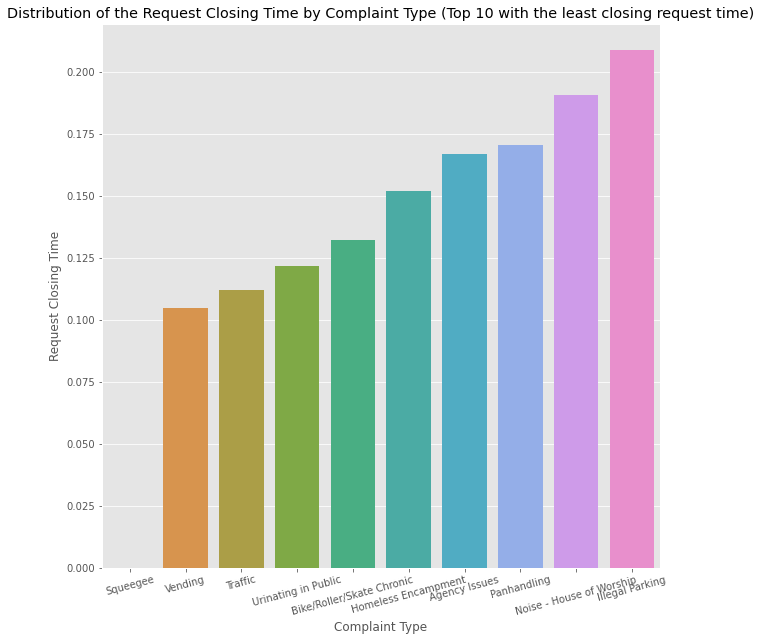

In [18]:
plt.figure(figsize=[10,10])
sns.barplot('Complaint Type', 'Request Closing Time', data=request_closing_time_by_complaint_type)
plt.xticks(rotation=15)
plt.title('Distribution of the Request Closing Time by Complaint Type (Top 10 with the least closing request time)');
plt.savefig('Request_closing_time_by_complaint_type.jpeg',papertype='a4')

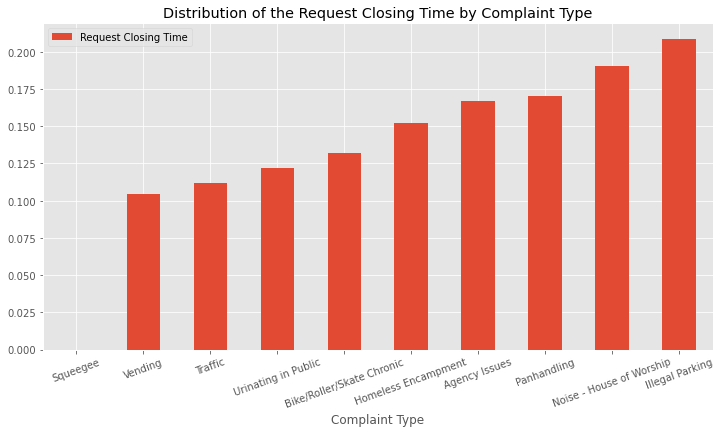

In [19]:
fig,ax=plt.subplots(figsize=[12,6])
request_closing_time_by_complaint_type.plot(kind='bar',x='Complaint Type',rot=20,ax=ax)
plt.title('Distribution of the Request Closing Time by Complaint Type');
plt.savefig('Request_closing_time_by_complaint_type.png',)

In [20]:
#Mean Request closing time for complaint type grouped by location type
mean_request_closing_time_per_location_type = \
dataset.groupby(['Location Type','Complaint Type'])[['Request Closing Time']].mean().\
sort_values(by='Request Closing Time').reset_index()

In [21]:
mean_request_closing_time_per_location_type[:10].to_csv('mean_request_closing_time_per_location_type.csv')
request_closing_time_by_complaint_type.to_csv('request_closing_time_by_complaint_type.csv')

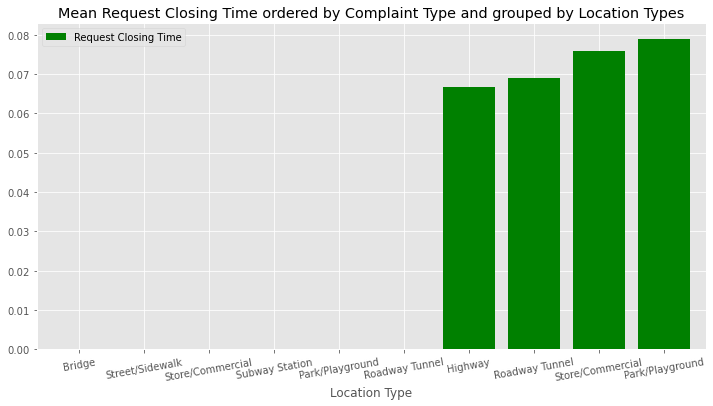

In [22]:
fig,ax= plt.subplots(figsize=[12,6])
mean_request_closing_time_per_location_type[:10].plot.bar(x='Location Type',rot=10,ax=ax,width=0.80,color='green')
plt.title('Mean Request Closing Time ordered by Complaint Type and grouped by Location Types')
plt.savefig('top10_mean_request_closing_time_per_location_type.jpg');

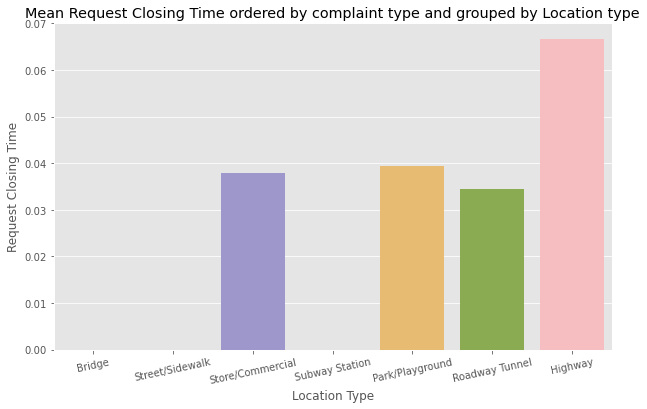

In [23]:
plt.figure(figsize=[10,6])
sns.barplot(x='Location Type', y= 'Request Closing Time',data=mean_request_closing_time_per_location_type[:10], ci=False)
plt.xticks(rotation=12)
plt.title('Mean Request Closing Time ordered by complaint type and grouped by Location type');

From the table above we can see that the complaint types with the fastest response are complaints made about a Homeless Encampment around the Bridge, Roadway tunnel, Squeegee in street/sidewalk, panhandling around the park/playground and Posting Advertisement around store/commercials.

In [24]:
complaints_by_city = dataset[['City','Complaint Type']]

In [25]:
top_10_complaints_by_city= dataset.groupby(['City']).agg({'Complaint Type':'count'}\
                                              ).sort_values(by='Complaint Type',ascending =False).reset_index()[:10]

In [26]:
top_10_complaints_by_city.to_csv('top_10_complaints_by_city.csv')

In [27]:
top_10_complaints_by_city

,City,Complaint Type
0,BROOKLYN,98295
1,NEW YORK,65972
2,BRONX,40697
3,STATEN ISLAND,12338
4,JAMAICA,7294
5,ASTORIA,6330
6,FLUSHING,5970
7,RIDGEWOOD,5162
8,CORONA,4295
9,WOODSIDE,3544


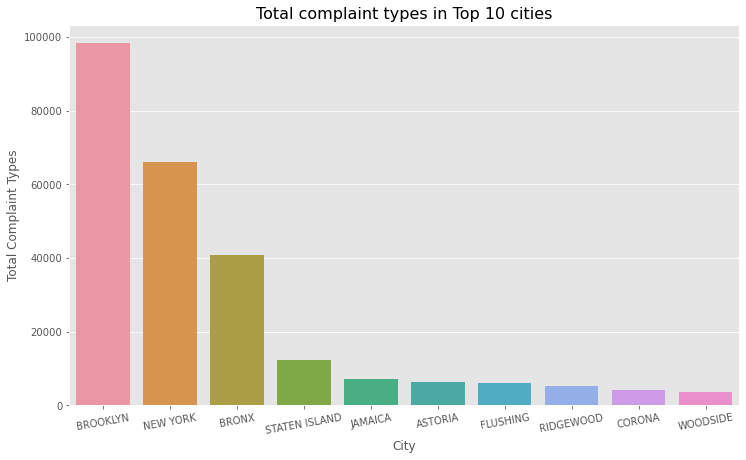

In [28]:
plt.figure(figsize=[12,7])
sns.barplot('City', 'Complaint Type', data=top_10_complaints_by_city)
plt.xticks(rotation=10)
plt.title('Total complaint types in Top 10 cities', fontsize=16)
plt.ylabel('Total Complaint Types');
plt.savefig('request_closing_request_time_by_city.jpeg',dpi=100)


From the table above we see that the city with the major complaints are made is Brooklyn, followed by New York. With Howard Beach as the least city

In [29]:
most_complaint_type = pd.value_counts(dataset['Complaint Type'])

In [30]:
most_complaint_type.reset_index().to_csv('most_complaint_type.csv')

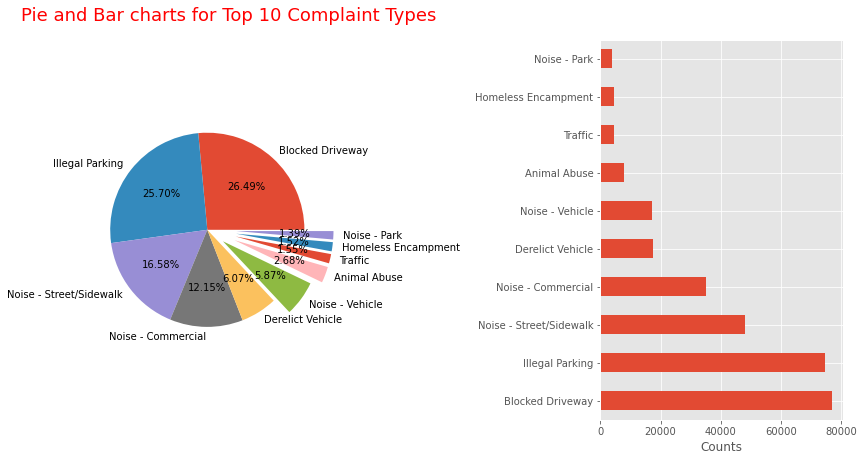

In [31]:
fig,ax = plt.subplots(1,2, figsize=[12,6.5])
fig.suptitle('Pie and Bar charts for Top 10 Complaint Types', fontsize=18, color='red', ha='right')

most_complaint_type[:10].plot(kind='pie',autopct='%.2f%%',ax=ax[0],explode=(0,0,0,0,0,0.2,0.3,0.3,0.3,0.3))
ax[0].set(ylabel='')

most_complaint_type[:10].plot.barh(x='Complaint Type',ax=ax[1])
ax[1].set_xlabel('Counts')
plt.tight_layout(1.2)
plt.savefig('Top_10_Complaint_Types.jpeg',dpi=140, papertype='a3');

 From the visualisation, we see that the top complaints are complaints involving Blocked Driveways followed by Illegal packing. The least are complaints involving vending machine matters

In [32]:
dataset.Status.value_counts().to_frame()

,Status
Closed,298471
Open,36
Assigned,26
Draft,1


This tells us that majority of the complaint cases opened were closed.

In [33]:
dataset['Request Closing Time'].value_counts().to_frame().sort_index()

,Request Closing Time
0,230530
1,66168
2,1448
3,243
4,71
5,27
6,25
7,13
8,3
9,2


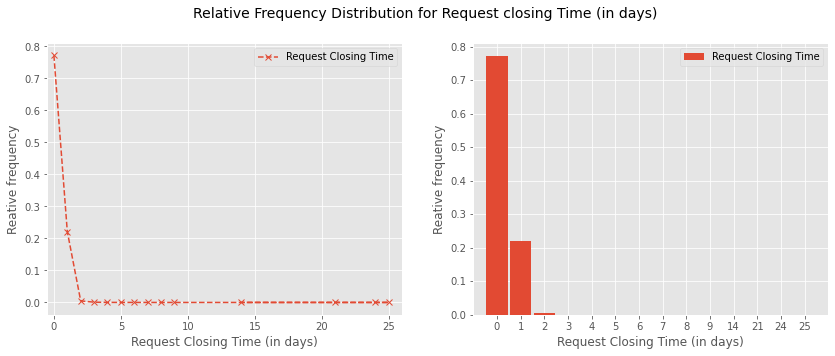

In [34]:
fig,ax= plt.subplots(1,2,figsize=[14,5])
dataset['Request Closing Time'].value_counts().to_frame().transform(lambda x:x/x.sum()).plot(marker='x',ax=ax[0],linestyle='--')
ax[0].set(xlim=(-0.5,26),xlabel= 'Request Closing Time (in days)',ylabel= 'Reative frequency')

dataset['Request Closing Time'].value_counts().to_frame().sort_index().transform(lambda x:x/x.sum()).plot(kind='bar',ax=ax[1],rot=0,width=0.9)
ax[1].set(xlabel= 'Request Closing Time (in days)',ylabel= 'Reative frequency',xlim=(-1,14))
fig.suptitle('Relative Frequency Distribution for Request closing Time (in days)',fontsize=14);

From the table we see that majority of the complaint cases filed was closed in less than a day

Statistical Testing
Questions:

Is the average response time across complaint types similar or not (overall)
Are the type of complaint or service requested and location related
Question 1

We will be using one way ANOVA to test the similarity or difference in mean response time across complaint types (ie if the difference across their means is statstically significant or not.

Firstly, we will state our hypotheses:

Hypotheses statements

Null hypothesis: The average response time across complaint types is equal or similar.

Alternative hypothesis: The average response time across complaint types is not equal or is different.

alpha= 0.05

In [35]:
from scipy.stats import f_oneway

In [36]:
unique_complaint_type = dataset['Complaint Type'].unique().tolist()

In [37]:
print(unique_complaint_type, end='')

['Noise - Street/Sidewalk', 'Blocked Driveway', 'Illegal Parking', 'Derelict Vehicle', 'Noise - Commercial', 'Noise - House of Worship', 'Posting Advertisement', 'Noise - Vehicle', 'Animal Abuse', 'Vending', 'Traffic', 'Drinking', 'Bike/Roller/Skate Chronic', 'Panhandling', 'Noise - Park', 'Homeless Encampment', 'Urinating in Public', 'Graffiti', 'Disorderly Youth', 'Illegal Fireworks', 'Agency Issues', 'Squeegee', 'Animal in a Park']

In order to create arrays for each of the complaint types, i will create a dictionary of complaint types, each with their request closing times as lists, and then convert each of them to arrays

In [38]:
from collections import defaultdict

In [39]:
complaint_type_dict = defaultdict(list)

In [40]:
for complaint, closing_time in dataset[['Complaint Type','Request Closing Time']].values:
    if complaint in unique_complaint_type:
        complaint_type_dict[complaint].append(closing_time)

In [41]:
#same with the number of unique complaint types
len(complaint_type_dict) 

23

In [42]:
complaint_type_array = np.array([array for key,array in complaint_type_dict.items()]) #converting each list to array

# or use np.append([],[array for key,array in complaint_type_dict.items()]) #converting each list to array

In [43]:
noise_street_sidewlak = complaint_type_array[0]
blocked_driveway = complaint_type_array[1]
illegal_parking = complaint_type_array[2]
derelict_vehicle =complaint_type_array[3]
noise_commercial = complaint_type_array[4]
posting_advert = complaint_type_array[5]
noise_vehicle = complaint_type_array[6]
animal_abuse = complaint_type_array[7]
vending = complaint_type_array[8]
traffic = complaint_type_array[9]
drinking = complaint_type_array[10]
bike_roller_skate = complaint_type_array[11]
panhandling = complaint_type_array[12]
noise_park = complaint_type_array[13]
homeless_encamp = complaint_type_array[14]
urinate_pub = complaint_type_array[15]
graffiti = complaint_type_array[16]
disorder_youth = complaint_type_array[17]
illegal_fireworks = complaint_type_array[18]
agency_issues = complaint_type_array[19]
squeegee = complaint_type_array[20]
animal_park = complaint_type_array[21]

In [44]:
#One way ANOVA to test if the difference in means is statistically significant or not
F_statistic,p_val = \
f_oneway(noise_street_sidewlak,blocked_driveway,illegal_parking,derelict_vehicle,noise_commercial,\
         posting_advert,noise_vehicle,animal_abuse,vending,traffic,drinking,bike_roller_skate,panhandling,\
         noise_park,homeless_encamp,urinate_pub,graffiti,disorder_youth,illegal_fireworks,agency_issues,\
         squeegee,animal_park)

In [45]:
print('F-Statistic: {}, p-value:{}'.format(F_statistic,p_val))

F-Statistic: 113.60854996102988, p-value:0.0


From the one way ANOVA test, the p-value is far less than the significance level so we will reject the null hypothesis and conclude that the mean request closing time across complaint types is different, overall

Question 2

In testing the relationship between location type and complaint type,we will use the chi square test for independence.

Null hypothesis : There is no relationship/association between location type and complaint type

Alternative Hypothesis: There is a relationship/an association between location type and complaint type

Alpha: 5% 

In [46]:
from scipy.stats import chi2_contingency

In [47]:
contingency_table = pd.crosstab(dataset['Location Type'], dataset['Complaint Type'])

In [48]:
chisq_statistic, p_value, ddof, expected = chi2_contingency(contingency_table.values)

In [49]:
print('Chi square statistic: {}, p-value: {}'.format(chisq_statistic,p_value))

Chi square statistic: 1328207.9670820665, p-value: 0.0


From the chi square test results, we see that the p-value is less than the alpha or level of significance, hence we will reject our null hypothesis and conclude that there is a relationship between Location Type and Complaint Type

In [50]:
with open('Statisctical testing.txt', 'r+') as file:
    f = file.read()